<a href="https://colab.research.google.com/github/CromaAq/Analise-De-Acoes-Com-Python/blob/main/Analise_Acoes_com_Python-Parte%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - **Importando Bibliotecas**

In [12]:
# Configurando Yahoo Finance
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sms
sms.set()

import random

# 2 - **Obtendo e tratando os dados**



In [14]:
tickers_ibov ="ABEV3.SA AZUL4.SA B3SA3.SA BBAS3.SA BBDC3.SA BBDC4.SA BBSE3.SA BPAC11.SA BRAP4.SA BRDT3.SA BRFS3.SA BRKM5.SA BRML3.SA BTOW3.SA CCRO3.SA CIEL3.SA CMIG4.SA COGN3.SA CRFB3.SA CSAN3.SA CSNA3.SA CVCB3.SA CYRE3.SA ECOR3.SA EGIE3.SA ELET3.SA ELET6.SA EMBR3.SA ENBR3.SA EQTL3.SA FLRY3.SA GGBR4.SA GNDI3.SA GOAU4.SA GOLL4.SA HAPV3.SA HGTX3.SA HYPE3.SA IGTA3.SA IRBR3.SA ITSA4.SA ITUB4.SA JBSS3.SA KLBN11.SA LAME4.SA LREN3.SA MGLU3.SA MRFG3.SA MRVE3.SA MULT3.SA NTCO3.SA PCAR4.SA PETR3.SA PETR4.SA QUAL3.SA RADL3.SA RAIL3.SA RENT3.SA SANB11.SA SBSP3.SA SMLS3.SA SULA11.SA SUZB3.SA TAEE11.SA TIMP3.SA TOTS3.SA UGPA3.SA USIM5.SA VALE3.SA VIVT4.SA VVAR3.SA WEGE3.SA YDUQ3.SA"

dados_yahoo = yf.download(tickers=tickers_ibov,period="1y")["Adj Close"]

ibov = yf.download("BOVA11.SA", period="1y")["Adj Close"]
ibov = ibov / ibov.iloc[0]

[*********************100%***********************]  73 of 73 completed

11 Failed downloads:
- BTOW3.SA: No data found, symbol may be delisted
- BRDT3.SA: No data found, symbol may be delisted
- PCAR4.SA: No data found, symbol may be delisted
- SMLS3.SA: No data found, symbol may be delisted
- HGTX3.SA: No data found, symbol may be delisted
- VIVT4.SA: No data found, symbol may be delisted
- GNDI3.SA: No data found, symbol may be delisted
- VVAR3.SA: No data found, symbol may be delisted
- LAME4.SA: No data found, symbol may be delisted
- TIMP3.SA: No data found, symbol may be delisted
- IGTA3.SA: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed


In [21]:
dados_yahoo.dropna(how='all', inplace=True)
dados_yahoo.dropna(axis=1, inplace=True, thresh=246)

In [16]:
dados_yahoo

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BPAC11.SA,BRAP4.SA,BRFS3.SA,...,SBSP3.SA,SULA11.SA,SUZB3.SA,TAEE11.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-14,15.216166,38.099998,17.323040,27.204468,19.713375,22.457069,22.323090,24.482071,49.282223,24.270000,...,41.460930,32.315254,70.508591,35.090900,30.624502,20.380331,19.215803,91.534828,37.566433,31.851686
2021-04-15,15.273911,37.820000,17.175091,27.241228,19.782791,22.457069,22.201054,24.396021,49.672913,24.299999,...,42.114796,31.680845,71.249748,35.001678,31.000748,20.594862,19.391249,92.569946,38.586536,31.713886
2021-04-16,15.206541,37.810001,17.439516,27.360710,20.060440,22.718201,22.276152,25.042614,49.933376,23.590000,...,42.590336,31.998051,70.281311,35.822517,30.842327,20.565607,19.917582,92.963455,37.970535,31.654827
2021-04-19,15.139170,37.959999,17.112133,27.222851,19.814024,22.615492,21.853722,24.523863,50.721619,23.870001,...,41.351955,32.216129,71.249748,36.420300,30.961145,20.750883,19.788309,92.159317,37.354527,30.709908
2021-04-20,15.033301,37.439999,16.910662,27.664001,19.518152,22.270800,21.900658,24.167377,49.878536,23.809999,...,41.906750,32.364822,71.437508,36.563057,30.782921,20.663120,19.465120,90.816246,36.403419,29.085825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-08,14.930000,23.799999,15.600000,34.849998,17.600000,21.480000,26.200001,25.590000,32.849998,17.440001,...,51.650002,32.259998,54.500000,44.330002,35.730000,13.730000,13.050000,95.150002,34.139999,20.350000
2022-04-11,15.200000,23.879999,14.880000,35.070000,17.629999,21.450001,25.930000,25.250000,32.669998,16.200001,...,51.330002,31.360001,54.189999,44.180000,35.450001,13.700000,12.950000,94.000000,32.549999,19.559999
2022-04-12,15.050000,23.660000,14.350000,35.000000,17.510000,21.260000,25.709999,24.799999,32.330002,15.900000,...,50.509998,30.750000,53.500000,44.520000,35.799999,14.140000,13.030000,93.370003,32.369999,18.850000


In [17]:
retorno = dados_yahoo.pct_change()
retorno

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BPAC11.SA,BRAP4.SA,BRFS3.SA,...,SBSP3.SA,SULA11.SA,SUZB3.SA,TAEE11.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-15,0.003795,-0.007349,-0.008541,0.001351,0.003521,0.000000,-0.005467,-0.003515,0.007928,0.001236,...,0.015771,-0.019632,0.010512,-0.002543,0.012286,0.010526,0.009130,0.011308,0.027155,-0.004326
2021-04-16,-0.004411,-0.000264,0.015396,0.004386,0.014035,0.011628,0.003383,0.026504,0.005244,-0.029218,...,0.011292,0.010013,-0.013592,0.023451,-0.005110,-0.001420,0.027143,0.004251,-0.015964,-0.001862
2021-04-19,-0.004430,0.003967,-0.018772,-0.005039,-0.012284,-0.004521,-0.018963,-0.020715,0.015786,0.011869,...,-0.029077,0.006815,0.013779,0.016687,0.003852,0.009009,-0.006490,-0.008650,-0.016223,-0.029851
2021-04-20,-0.006993,-0.013699,-0.011774,0.016205,-0.014932,-0.015241,0.002148,-0.014536,-0.016622,-0.002514,...,0.013416,0.004615,0.002635,0.003920,-0.005756,-0.004229,-0.016332,-0.014573,-0.025462,-0.052885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-08,-0.008632,-0.025788,-0.015773,0.017815,0.005140,0.011299,0.007692,-0.001950,-0.019403,-0.021324,...,-0.002896,-0.019751,0.000551,0.006814,0.000560,0.005124,-0.036189,-0.020385,0.000586,-0.018331
2022-04-11,0.018084,0.003361,-0.046154,0.006313,0.001704,-0.001397,-0.010305,-0.013286,-0.005479,-0.071101,...,-0.006196,-0.027898,-0.005688,-0.003384,-0.007837,-0.002185,-0.007663,-0.012086,-0.046573,-0.038821
2022-04-12,-0.009868,-0.009213,-0.035618,-0.001996,-0.006807,-0.008858,-0.008484,-0.017822,-0.010407,-0.018519,...,-0.015975,-0.019452,-0.012733,0.007696,0.009873,0.032117,0.006178,-0.006702,-0.005530,-0.036299


In [20]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BPAC11.SA,BRAP4.SA,BRFS3.SA,...,SBSP3.SA,SULA11.SA,SUZB3.SA,TAEE11.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-14,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2021-04-15,1.003795,0.992651,0.991459,1.001351,1.003521,1.000000,0.994533,0.996485,1.007928,1.001236,...,1.015771,0.980368,1.010512,0.997457,1.012286,1.010526,1.009130,1.011308,1.027155,0.995674
2021-04-16,0.999367,0.992389,1.006724,1.005743,1.017606,1.011628,0.997897,1.022896,1.013213,0.971982,...,1.027240,0.990184,0.996777,1.020849,1.007113,1.009091,1.036521,1.015607,1.010757,0.993819
2021-04-19,0.994940,0.996325,0.987825,1.000676,1.005106,1.007054,0.978974,1.001707,1.029207,0.983519,...,0.997372,0.996933,1.010512,1.037884,1.010993,1.018182,1.029793,1.006822,0.994359,0.964153
2021-04-20,0.987982,0.982677,0.976195,1.016892,0.990097,0.991706,0.981076,0.987146,1.012100,0.981047,...,1.010753,1.001534,1.013175,1.041953,1.005173,1.013876,1.012975,0.992150,0.969041,0.913164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-08,0.981193,0.624672,0.900535,1.281040,0.892795,0.956492,1.173673,1.045255,0.666569,0.718583,...,1.245751,0.998290,0.772955,1.263291,1.166713,0.673689,0.679129,1.039495,0.908790,0.638899
2022-04-11,0.998938,0.626772,0.858972,1.289126,0.894317,0.955156,1.161578,1.031367,0.662916,0.667491,...,1.238033,0.970440,0.768559,1.259016,1.157570,0.672217,0.673924,1.026932,0.866465,0.614096
2022-04-12,0.989080,0.620997,0.828377,1.286553,0.888229,0.946695,1.151722,1.012986,0.656018,0.655130,...,1.218255,0.951563,0.758773,1.268705,1.168999,0.693806,0.678088,1.020049,0.861673,0.591805


# 3 - **Resultados**


In [40]:
carteira = random.choices(dados_yahoo.columns, k=5)
carteira = 10000 * retorno_acumulado.loc[: , carteira]
carteira ['saldo'] = carteira.sum(axis=1)
carteira ['retorno'] = carteira ['saldo'].pct_change()
carteira

,NTCO3.SA,SBSP3.SA,IRBR3.SA,JBSS3.SA,PETR4.SA,saldo,retorno
Date,,,,,,,
2021-04-14,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,50000.000000,NaN
2021-04-15,10145.929012,10157.706500,9704.968858,10363.364651,9801.688497,50173.657518,0.003473
2021-04-16,9631.336038,10272.402471,9580.745375,10033.033502,9742.258143,49259.775528,-0.018214
2021-04-19,9602.533902,9973.716350,9798.136470,10408.408694,10306.841764,50089.637181,0.016847
2021-04-20,9452.764557,10107.527703,9704.968858,10525.526301,10111.572407,49902.359826,-0.003739
...,...,...,...,...,...,...,...
2022-04-08,5174.731147,12457.511611,5062.111741,13102.374777,17285.209764,53081.939041,0.009200
2022-04-11,5028.801769,12380.330589,4937.888259,12879.269366,17153.840231,52380.130213,-0.013221
2022-04-12,5011.520634,12182.553184,4798.136470,12629.121539,17103.313001,51724.644829,-0.012514


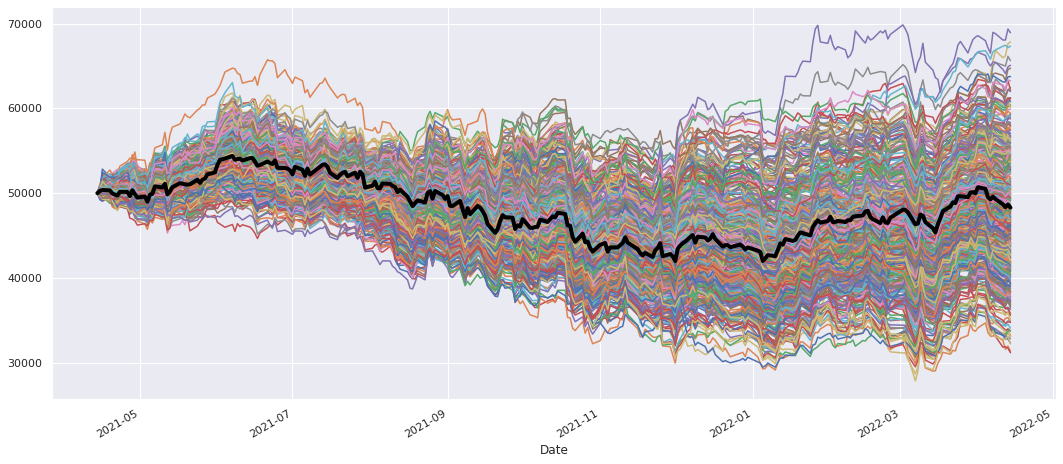

In [39]:
for i in range(500):
 carteira = random.choices(dados_yahoo.columns, k=5)
 carteira = 10000 * retorno_acumulado.loc[: , carteira]
 carteira['saldo'] = carteira.sum(axis=1)
 carteira['saldo'].plot(figsize=(18,8))

(ibov*50000).plot(linewidth=4, color="black")